In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

dengue = pd.read_csv('datasets\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [2]:
dengue.info

<bound method DataFrame.info of           Month  Year    Region  Dengue_Cases  Dengue_Deaths
0       January  2016  Region I           705              1
1      February  2016  Region I           374              0
2         March  2016  Region I           276              0
3         April  2016  Region I           240              2
4           May  2016  Region I           243              1
...         ...   ...       ...           ...            ...
1015     August  2020     BARMM            91              0
1016  September  2020     BARMM            16              8
1017    October  2020     BARMM            13              9
1018   November  2020     BARMM            15              1
1019   December  2020     BARMM            23              0

[1020 rows x 5 columns]>

In [3]:
dengue['Year'] = dengue['Year'].astype('int64')

In [4]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h2>SAMPLE </h2>

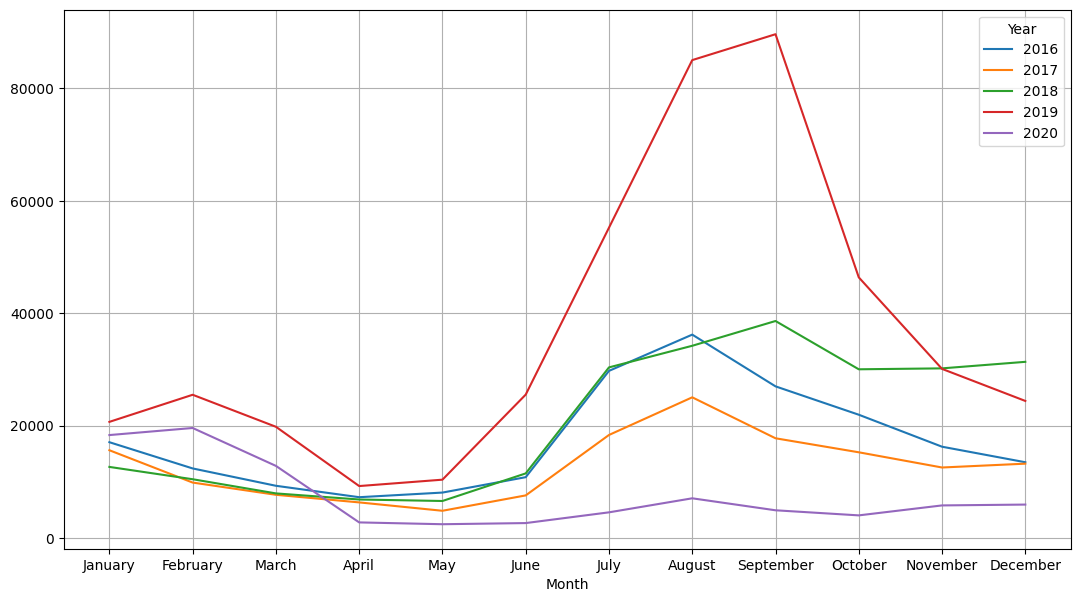

In [5]:
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month, ordered=True)

cases_month = dengue.groupby([dengue.Month, dengue.Year])['Dengue_Cases'].sum()
cases_month.unstack().plot()
plt.gcf().set_size_inches(13,7)
plt.grid(True)
plt.xticks(range(0,12), month)
plt.show()

In [6]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h2>1. Total number of dengue cases and deaths per year</h2>

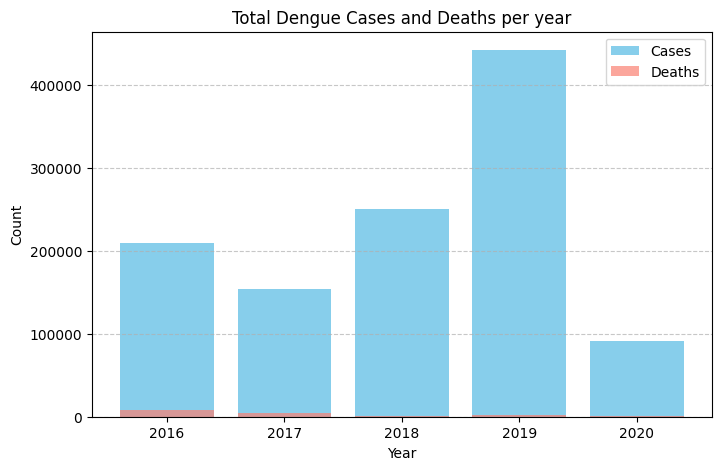

In [7]:
yearly = dengue.groupby('Year')[['Dengue_Cases','Dengue_Deaths']].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(yearly['Year'],yearly['Dengue_Cases'], label='Cases', color='skyblue')
plt.bar(yearly['Year'],yearly['Dengue_Deaths'],label='Deaths',color='salmon',alpha=0.7)
plt.title('Total Dengue Cases and Deaths per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

<h2>INSIGHT 1. The graph shows that dengue cases were highest in 2019 and went down a lot in 2020. Deaths stayed low each year. This means people are getting better treatment and more aware. Dengue cases change every year, showing it can rise and fall over time.
 </h2>

<h2>2. Which region recorded the highest total dengue cases?<h2>

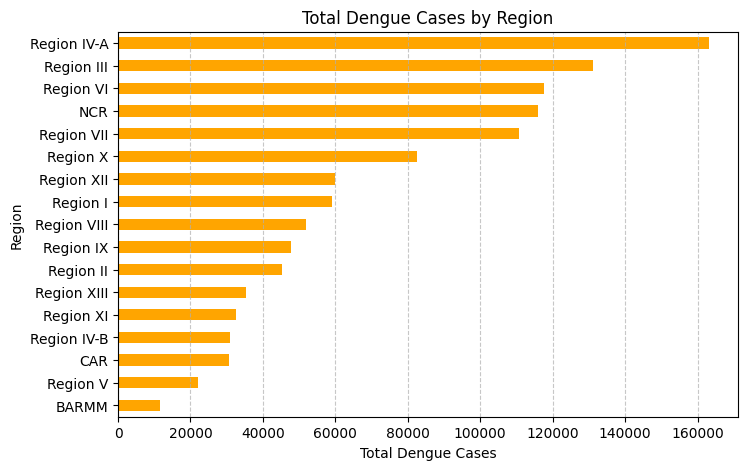

In [8]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=True)

plt.figure(figsize=(8,5))
region_cases.plot(kind='barh', color='orange')
plt.title('Total Dengue Cases by Region')
plt.xlabel('Total Dengue Cases')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<h2>INSIGHT 2. Region IV-A has the most dengue cases, followed by Regions III, VI, and NCR. These areas have the highest numbers, showing they were most affected. Regions like BARMM and Region V have the least cases.</h2>

<h2>3. What is the monthly trend of dengue cases across all years?<h2>

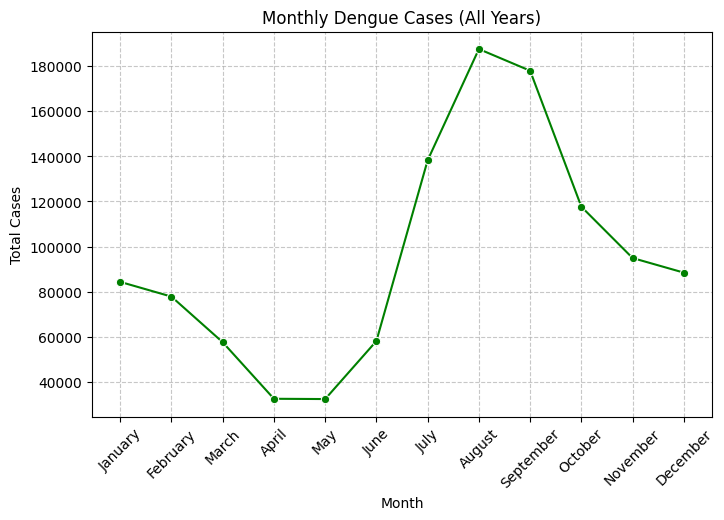

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dengue' is your DataFrame and it has 'Month' and 'Dengue_Cases' columns
# Ensure 'Month' is ordered correctly (from January to December)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' to a categorical type with the correct order
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Group by 'Month' and sum 'Dengue_Cases'
monthly = dengue.groupby('Month')['Dengue_Cases'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(8, 5))
sns.lineplot(data=monthly, x='Month', y='Dengue_Cases', marker='o', color='green')
plt.title('Monthly Dengue Cases (All Years)')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)  # Rotate month labels if they overlap
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<h2>INSIGHT 3.Based on the graph , Dengue cases are highest in August across all years from 2016-2020, showing that the rainy season brings more infections. July also has many cases, while April and May have the fewest. This means dengue usually spreads more during the middle and later months of the year when mosquitoes are more active.</h2>

<h2>4.Which regions show the highest dengue death rate (deaths per case)?<h2>

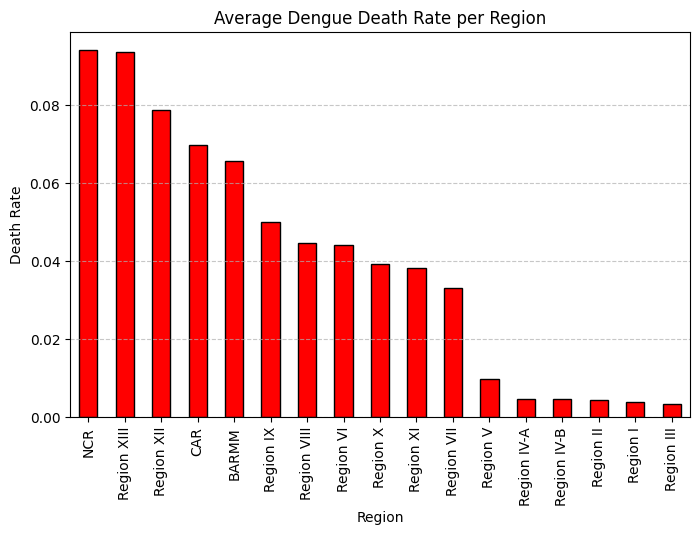

In [11]:
dengue['Death_Rate'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
rate_region = dengue.groupby('Region')['Death_Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
rate_region.plot(kind='bar', color='red', edgecolor='black')
plt.title('Average Dengue Death Rate per Region')
plt.xlabel('Region')
plt.ylabel('Death Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h2>INSIGHT 4 The graph shows that NCR and Region XIII have the highest dengue death rates, meaning these areas face more severe cases or slower treatment. In contrast, regions like I, II, III, IV-A, and IV-B have lower death rates, suggesting better healthcare access, faster treatment, or stronger dengue prevention efforts.
 </h2>

<h2>5.What is the percentage contribution of each region to total dengue cases?</h2>

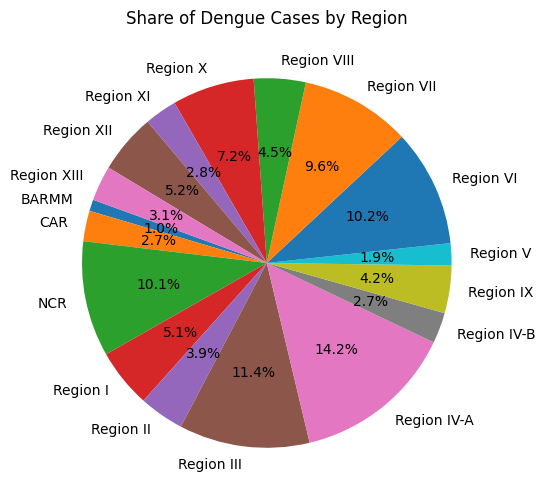

In [12]:
region_share = dengue.groupby('Region')['Dengue_Cases'].sum()

plt.figure(figsize=(6,6))
plt.pie(region_share, labels=region_share.index, autopct='%1.1f%%', startangle=160)
plt.title('Share of Dengue Cases by Region')
plt.show()

<h2>INSIGHT 5. Region IV-A has the largest share of dengue cases with 14.2%, followed by Region III (11.4%), Region VI (10.2%), and NCR (10.1%). This means these areas experience the highest number of dengue cases, likely due to higher population and urban density.</h2>

<h2>INSIGHT 6. WHILE, Regions like CAR, Region V, and BARMM have the smallest shares, each below 3%. This shows that dengue is less common in these regions, possibly because of smaller populations, cooler climates, or better control of mosquito breeding areas.</h2>

<h2>6. Which month and region combination had the highest recorded dengue cases?</h2>

In [13]:
import pandas as pd

# Load the data into a pandas DataFrame
dengue = pd.read_csv('datasets\\dengue.csv')

max_row = dengue.loc[dengue['Dengue_Cases'].idxmax()]
print("Highest Dengue Case Record:")
print(max_row[['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths']])

Highest Dengue Case Record:
Month              September
Year                    2019
Region           Region IV-A
Dengue_Cases           21658
Dengue_Deaths             48
Name: 224, dtype: object


<h2>INSIGHT 7. Based on the above data,there is severe outbreak in 2019. The high number of cases in September 2019 shows that dengue reached its peak during this time, likely due to heavy rains and ideal breeding conditions for mosquitoes.</h2>

<h2>INSIGHT 8. Region IV-A as a high risk area. Having the highest number of cases means Region IV-A was the most affected area, showing the need for stronger dengue prevention programs and public health awareness in the region.</h2>

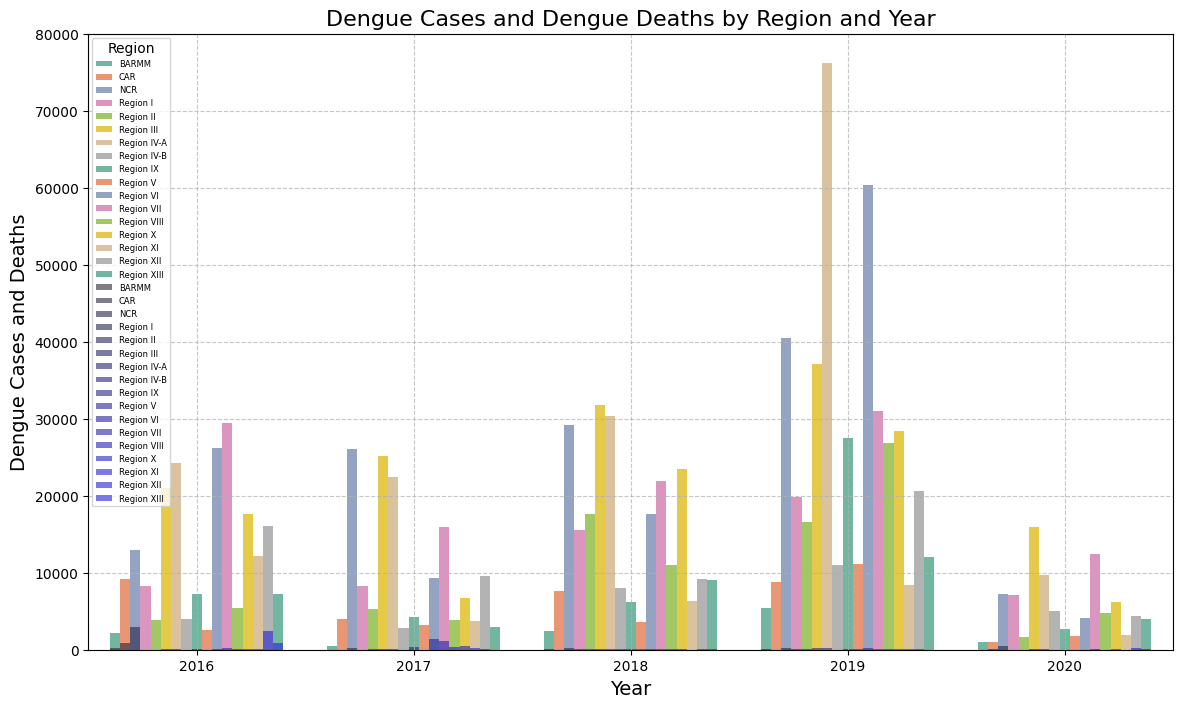

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


aggregated_data = dengue.groupby(['Year', 'Region'])[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()


plt.figure(figsize=(14, 8))


sns.barplot(data=aggregated_data, x='Year', y='Dengue_Cases', hue='Region', ci=None, palette='Set2')


sns.barplot(data=aggregated_data, x='Year', y='Dengue_Deaths', hue='Region', ci=None, palette='dark:blue', alpha=0.6)

plt.title('Dengue Cases and Dengue Deaths by Region and Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Dengue Cases and Deaths', fontsize=14)
plt.legend(title='Region', loc='upper left',fontsize=6)


plt.grid(True, linestyle='--', alpha=0.7)


plt.show()


<h2>INSIGHT 9 . 2019 Surge in Dengue Cases:
There was a massive spike in dengue cases across almost all regions in 2019, with Region IV-A recording the highest number of cases. This suggests a nationwide outbreak during that year.</h2>

<h2>INSIGHT 10. Regional Consistency in Trends:
Regions like Region IV-A, NCR, and Region III consistently showed higher dengue cases compared to other regions from 2016–2020, indicating these areas are persistent hotspots for dengue infections.
</h2>

<h2>INSIGHT 11. Sharp Decline in 2020:
Dengue cases and deaths drastically decreased in 2020, possibly due to pandemic restrictions (reduced mobility, better sanitation) that limited mosquito exposure and transmission.</h2>

<h1>Prediction using Linear Regression</h1>

<h2>New Library </H2>
<hr>
<h4>SCIKT LEARN</h4>
<h3> pip install scikit-learn</h3>

In [14]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import sklearn

In [16]:
dengue['Month'] = dengue['Month'].astype('str')

In [17]:
# Combine Month and Year into a Date column
dengue['Date'] = pd.to_datetime(dengue['Month'] + ' ' + dengue['Year'].astype(str))

# Optional: sort by date
dengue = dengue.sort_values('Date')

In [18]:
region4_df = dengue[dengue['Region'] == 'Region IV-A']
monthly_cases = region4_df.groupby('Date')['Dengue_Cases'].sum().reset_index()


In [19]:
monthly_cases

,Date,Dengue_Cases
0,2016-01-01,2993
1,2016-02-01,2035
2,2016-03-01,1327
3,2016-04-01,838
4,2016-05-01,714
5,2016-06-01,778
6,2016-07-01,2270
7,2016-08-01,3218
8,2016-09-01,3454
9,2016-10-01,3175


In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert dates to ordinal for regression
#monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(lambda x: x.toordinal())
#other
monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(pd.Timestamp.toordinal)

# # Reshape for sklearn
X = monthly_cases['Date_Ordinal'].values.reshape(-1, 1)
y = monthly_cases['Dengue_Cases'].values

# # Fit model
model = LinearRegression()
model.fit(X, y)

# # Predict
monthly_cases['Predicted_Cases'] = model.predict(X)

# # Evaluate: R-squared
r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in dengue cases.")


The model explains 1.7% of the variation in dengue cases.


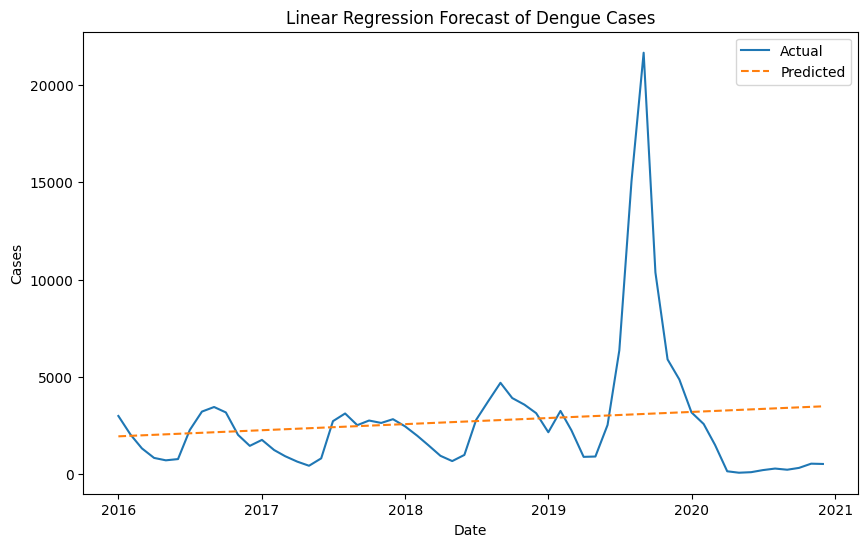

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(monthly_cases['Date'], monthly_cases['Dengue_Cases'], label='Actual')
plt.plot(monthly_cases['Date'], monthly_cases['Predicted_Cases'], label='Predicted', linestyle='--')
plt.legend()
plt.title('Linear Regression Forecast of Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()